In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pp_df = pd.read_csv('pp_lula_by_municipio.csv')
pp_df.head()

,SG_UF,NM_MUNICIPIO,CD_MUNICIPIO,QT_VOTOS,PP_LULA
0,RO,GUAJARÁ-MIRIM,19,19839,0.344675
1,RO,NOVA MAMORÉ,434,13123,0.220757
2,RO,PORTO VELHO,35,261935,0.353660
3,RO,ITAPUÃ DO OESTE,493,4378,0.375057
4,RO,JI-PARANÁ,51,68126,0.245295


In [2]:
pib_df = pd.read_html('https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_do_Brasil_por_PIB')[0]
pib_df = pib_df.rename(columns={"Produto Interno Bruto (em R$ 1 000)":"pib"})
pib_df['Município'] = pib_df['Município'].apply(str.upper)
pib_df = pib_df[['Município','pib']]
pib_df.head()

,Município,pib
0,SÃO PAULO,828 980 607
1,RIO DE JANEIRO,359 634 752
2,BRASÍLIA,286 943 782
3,BELO HORIZONTE,105 829 675
4,MANAUS,103 281 436


In [6]:
from helpers import get_nearest
print(pib_df.columns)

def get_item_from_df(municipe,df,item):
    try:
        pib = df[df['Município'] == municipe][item].values[0]
    except Exception as e:
        try:
            nearest = get_nearest(municipe,df['Município'])
            pib = df[df['Município'] == nearest][item].values[0]
        except Exception as e:
            print(municipe,item)
            return np.nan
    return pib

pp_df['pib'] = pp_df['NM_MUNICIPIO'].apply(lambda x: get_item_from_df(x,pib_df,'pib'))
pp_df.head()

Index(['Município', 'pib'], dtype='object')


,SG_UF,NM_MUNICIPIO,CD_MUNICIPIO,QT_VOTOS,PP_LULA,pib
0,RO,GUAJARÁ-MIRIM,19,19839,0.344675,984 586
1,RO,NOVA MAMORÉ,434,13123,0.220757,601 910
2,RO,PORTO VELHO,35,261935,0.353660,19 448 762
3,RO,ITAPUÃ DO OESTE,493,4378,0.375057,192 783
4,RO,JI-PARANÁ,51,68126,0.245295,4 057 626


In [18]:
idh_df = pd.read_html('https://www.undp.org/pt/brazil/idhm-munic%C3%ADpios-2010')[0]
idh_df = idh_df.rename(columns={"IDHM 2010":"idh"})
idh_df['Município'] = idh_df['Município'].apply(lambda x : x.upper().split('(')[0])
idh_df = idh_df[['Município','idh']]
idh_df.head()

,Município,idh
0,SÃO CAETANO DO SUL,862
1,ÁGUAS DE SÃO PEDRO,854
2,FLORIANÓPOLIS,847
3,BALNEÁRIO CAMBORIÚ,845
4,VITÓRIA,845


In [20]:
pp_df['idh'] = pp_df['NM_MUNICIPIO'].apply(lambda x: get_item_from_df(x,idh_df,'idh'))

<AxesSubplot: xlabel='pib', ylabel='PP_LULA'>

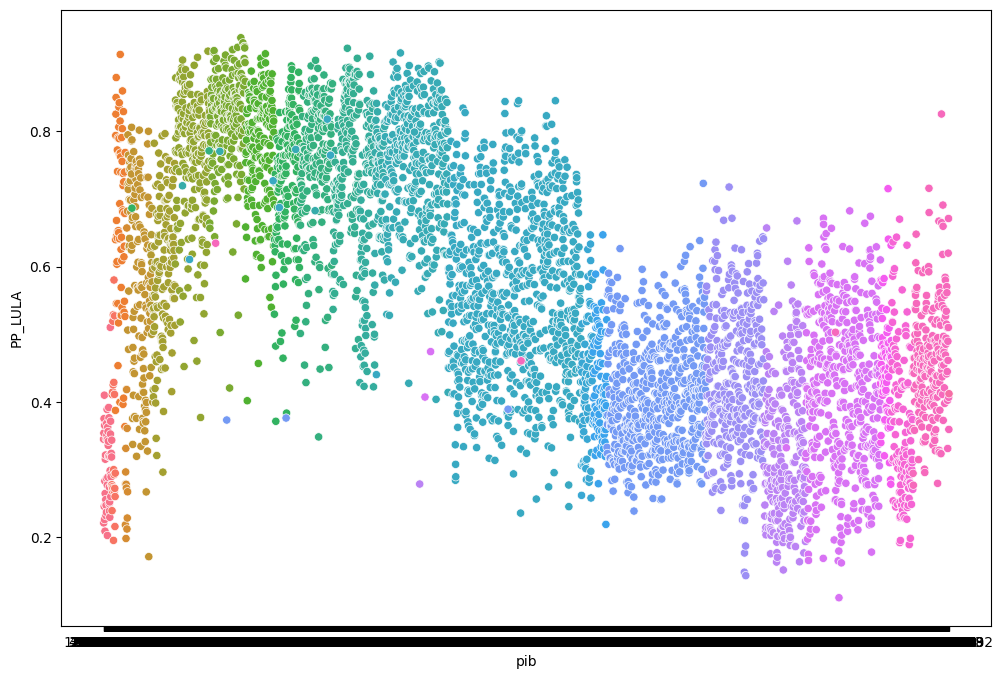

In [21]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='pib',y='PP_LULA',data=pp_df, hue='SG_UF',legend=False)

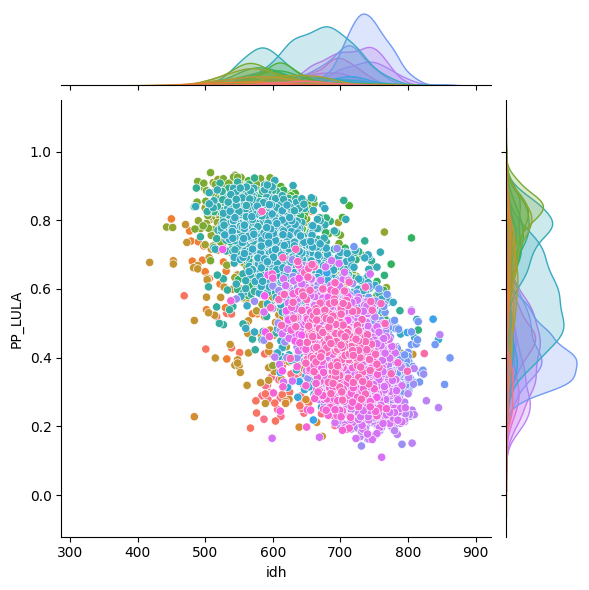

In [24]:
sns.jointplot(x='idh',y='PP_LULA',data=pp_df, hue='SG_UF',legend=False)

<Figure size 1200x800 with 0 Axes>

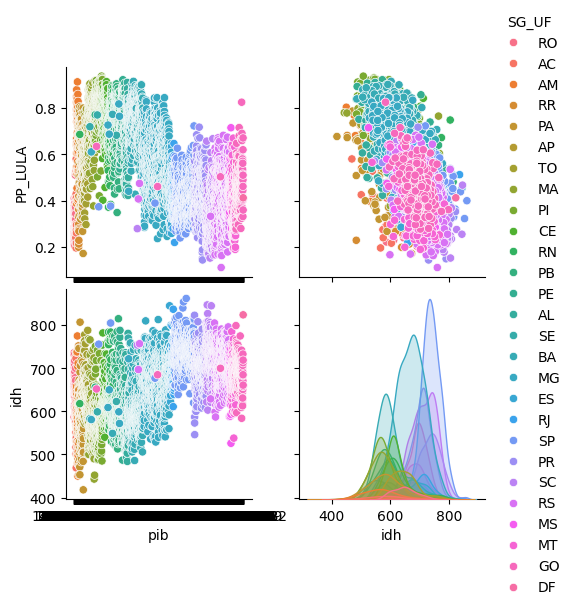

In [32]:
plt.figure(figsize=(12,8))
sns.pairplot(pp_df[['SG_UF','PP_LULA','pib','idh']],x_vars=['pib','idh'], hue='SG_UF')